In [1]:
import numpy as np
import pandas as pd

# 1. Data Gathering

In [2]:
## download the image-predictions.tsv
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'

In [3]:
import requests
import os

file = url.split('/')[-1]
path = './WeRateDogs_data/'
r = requests.get(url, stream=True)

if os.path.isfile(path + file):
    print("File {} exist!".format(file))
    #http://docs.python-requests.org/en/master/user/quickstart/#make-a-request
else:
    with(open(path + file, 'ab')) as fd:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:
                fd.write(chunk)

File image-predictions.tsv exist!


## 1.1 Read all seperate files

In [271]:
## No vpn, just use github stored files

In [2]:
# file 1
# not used this time like below rows shows
#df_json = pd.read_json('./WeRateDogs_data/tweet_json.txt', lines=True)

In [2]:
import json
## not use many this files, may just read parts of data
tweet_list=[]
with open('./WeRateDogs_data/tweet_json.txt','r') as f:
    for row in f:
        json_dict= json.loads(row)  
        to_append= {
            'tweet_id':json_dict['id'],
            'retweet_count':json_dict['retweet_count'],
            'favorite_count':json_dict['favorite_count']
        }
        tweet_list.append(to_append)
df_json=pd.DataFrame(tweet_list, columns=['tweet_id','retweet_count','favorite_count'])

In [3]:
# file 2
df_image = pd.read_csv('./WeRateDogs_data/image-predictions.tsv', delimiter='\t')

In [ ]:
# p1 是对推特中图片算法 #1 的预测 → basset
# p1_conf 是 #1 预测中算法的可信度 → 0.555712
# p1_dog 是 #1 预测是否是狗的品种 → True

In [4]:
# file 3
df_twitter = pd.read_csv('./WeRateDogs_data/twitter-archive-enhanced.csv')

In [60]:
! ls 

WeRateDogs_data       wrangle_act-old.ipynb wrangle_report.pdf
act_report.pdf        wrangle_act.ipynb


In [6]:
df_json_clean    = df_json.copy()
df_image_clean   = df_image.copy()
df_twitter_clean = df_twitter.copy()

# 2. Data Assess

### 2 types of assessment:
- Visual
- Programmatic

Step:  **Define-Code-Test**

In [8]:
df_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


In [7]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [9]:
df_image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_image_clean.loc[2052, :].jpg_url

'https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg'

In [17]:
df_image_clean.loc[2059, :].jpg_url

'https://pbs.twimg.com/ext_tw_video_thumb/889278779352338437/pu/img/VlbFB3v8H8VwzVNY.jpg'

In [11]:
df_twitter_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
df_twitter_clean.loc[2349, :].text

"This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc"

#### Quality issue:
- 'df_json' row 29, retweet_count\favorite_count =	4\117, retweet_count not correct ???
- 'df_image_clean' coloumn name 'jpg_url' should change to 'iamge_url
- 'df_twitter_clean' table: row 2327, name is 'a', that's not correct
- 'df_twitter_clean' table: row 2335, name is 'an', that's not correct
- 'df_twitter_clean' table: row 2326, name is 'quite', that's not correct

#### Tidy data:
##### define: 
1. each variable forms a column
2. Each observation forms a column
3. Each type of observation form s a table

##### issue:
- 'df_twitter_clean' table: dog type [doggo floofer	pupper	puppo] should be in one column
- 'df_twitter_clean' table: text need split to content and url ???

In [14]:
# --- No use, when merge use how='inner'
## test id connection
#df_clean[df_clean['tweet_id'] == int(df_json_cleandf_tweet_clean['id'].sample().values)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None



1. ID no duplicated issue
2. ID counts in 3 files are not identical
3. ID can connect all three files *most of time*

# 3. Data Cleaning

### Requires:

收集上述数据的每个内容后，从视觉上和程序上，对质量和清洁度进行数据评估。关键要点：

- 我们只需要含有图片的原始评级 (不包括转发)。
- 充分评估和清洗整个数据集需要巨大努力，所以只有一些问题 (至少 8 个质量问题和 2 个清洁度问题) 的子集需要进行评估和清洗。
- 根据清洗数据的规则，清洗包括合并数据的独立内容。
- 如果分子评级超过分母评级，不需要进行清洗。这个 特殊评级系统 是 WeRateDogs 人气度较高的主要原因。



In [178]:
## if not null, need be drop out

## 我们只需要含有图片的原始评级 (不包括转发)
## https://discussions.youdaxue.com/t/topic/56305/2
## 只需要对 image 数据集进行 merge 时选择 inner 方式，就可以删掉没有图片的推文条目了

In [24]:
pd.merge?
# how='inner'
# inner: use intersection of keys from both frames, similar to a SQL inner
#        join; preserve the order of the left keys

In [35]:
df_twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [36]:
df_twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## file 2

In [88]:
#  not need ?

# df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype('str')

In [37]:
df_image_clean = df_image_clean.rename(columns={'jpg_url': 'image_url',
                                                'p1': 'Frist_prediction',
                                                'p1_conf': 'Frist_pred_conf',
                                                'p2': 'Second_prediction',
                                                'p2_conf': 'Second_pred_conf',
                                                'p3': 'Third_prediction',
                                                'p3_conf': 'Third_pred_conf',
                                                'p1_dog': 'is_dog_pred_Frist',
                                                'p2_dog': 'is_dog_pred_Second',
                                                'p3_dog': 'is_dog_pred_Third',
                                                })

In [38]:
df_image_clean.head()

,tweet_id,image_url,img_num,Frist_prediction,Frist_pred_conf,is_dog_pred_Frist,Second_prediction,Second_pred_conf,is_dog_pred_Second,Third_prediction,Third_pred_conf,is_dog_pred_Third
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [39]:
df_image_clean['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [93]:
df_image_clean.nlargest(5, 'img_num')[['Frist_pred_conf', 'Second_pred_conf', 'Third_pred_conf']]

,Frist_pred_conf,Second_pred_conf,Third_pred_conf
144,0.708163,0.091372,0.067325
779,0.943331,0.023675,0.007165
1024,0.982004,0.008943,0.007550
1161,0.883991,0.023542,0.016056
1286,0.912648,0.035059,0.026376


In [99]:
df_image_clean.loc[1024, :]

tweet_id                                           710588934686908417
image_url             https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg
img_num                                                             4
Frist_prediction                                             Pembroke
Frist_pred_conf                                              0.982004
is_dog_pred_Frist                                                True
Second_prediction                                            Cardigan
Second_pred_conf                                           0.00894347
is_dog_pred_Second                                               True
Third_prediction                                             malamute
Third_pred_conf                                             0.0075499
is_dog_pred_Third                                                True
Name: 1024, dtype: object

In [ ]:
## image_num != url_num

###  3. 2 Merge files 1 and 2 

In [43]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [44]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id              2075 non-null int64
image_url             2075 non-null object
img_num               2075 non-null int64
Frist_prediction      2075 non-null object
Frist_pred_conf       2075 non-null float64
is_dog_pred_Frist     2075 non-null bool
Second_prediction     2075 non-null object
Second_pred_conf      2075 non-null float64
is_dog_pred_Second    2075 non-null bool
Third_prediction      2075 non-null object
Third_pred_conf       2075 non-null float64
is_dog_pred_Third     2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [40]:
#df_image_tweet = pd.merge(df_json_clean2, df_image_clean2, on='tweet_id', how='left')
df_image_tweet = pd.merge(df_json_clean, df_image_clean, on='tweet_id') # how='left', upper are not need 

In [63]:
df_image_tweet.head()

,tweet_id,retweet_count,favorite_count,image_url,img_num,Frist_prediction,Frist_pred_conf,is_dog_pred_Frist,Second_prediction,Second_pred_conf,is_dog_pred_Second,Third_prediction,Third_pred_conf,is_dog_pred_Third
0,892420643555336193,8842,39492,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,6480,33786,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,4301,25445,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,8925,42863,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,9721,41016,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [64]:
df_image_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 14 columns):
tweet_id              2073 non-null int64
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
image_url             2073 non-null object
img_num               2073 non-null int64
Frist_prediction      2073 non-null object
Frist_pred_conf       2073 non-null float64
is_dog_pred_Frist     2073 non-null bool
Second_prediction     2073 non-null object
Second_pred_conf      2073 non-null float64
is_dog_pred_Second    2073 non-null bool
Third_prediction      2073 non-null object
Third_pred_conf       2073 non-null float64
is_dog_pred_Third     2073 non-null bool
dtypes: bool(3), float64(3), int64(4), object(4)
memory usage: 200.4+ KB


### Clean  File 3 - df_twitter_clean

In [46]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## File 3 issue:
1. timestamp can convert seperate cols;
2. get type from text
3. clean rating_numerator not > rating_denominator

In [115]:
import re

In [277]:
## get types from text

df_twitter_clean['types'] = np.nan

dog_lists = ['pupper', 'puppo', 'doggo', 'floof']

for i in range(len(df_twitter_clean.text)):
    text = df_twitter_clean.loc[i, 'text']
    types = []
    for dog in dog_lists:
        tt = re.findall(r'{}'.format(dog), text)
        if tt:
            types.append(tt[0]) #avoid more same chart.
    if types:
        df_twitter_clean.loc[i, 'types'] = ', '.join(str(x) for x in types)

        ## just little too ugly??

In [286]:
len(df_twitter_clean[df_twitter_clean.types == 'doggo'])

86

In [291]:
len(df_twitter_clean[~df_twitter_clean.types.isnull()])

418

In [292]:
df_twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'types'],
      dtype='object')

In [293]:
df_twitter_clean2 = df_twitter_clean.drop(['in_reply_to_status_id',
                                          'in_reply_to_user_id', 
                                          'source',
                                          'retweeted_status_id',
                                          'retweeted_status_user_id',
                                          'retweeted_status_timestamp',
                                          'expanded_urls',
                                          'doggo',
                                          'floofer',
                                          'pupper',
                                          'puppo'], axis=1)

### Clean name

In [294]:
df_twitter_clean2['name'].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
Sadie         8
the           8
an            7
Toby          7
Daisy         7
Buddy         7
Bailey        7
Koda          6
Jack          6
Leo           6
Rusty         6
Stanley       6
Milo          6
Scout         6
Oscar         6
Bella         6
Dave          6
Jax           6
Bentley       5
           ... 
Beemo         1
Cedrick       1
Ferg          1
Tino          1
Leonidas      1
Ashleigh      1
Dotsy         1
Dietrich      1
Sandra        1
Chubbs        1
Chef          1
Gert          1
Tupawc        1
Berb          1
Harry         1
Brian         1
Chevy         1
Superpup      1
Carter        1
Tanner        1
Mark          1
Sprout        1
Pip           1
Traviss       1
Koko          1
Dale          1
Bubba         1
Vinnie        1
Rambo         1
Tove          1
Name: name, Length: 957,

Checked upper results we can list some incorrect name/counts:

1. None              745
2. a                  55
3. the                 8
4. an                  7
5. officially          1
6. his                 1
7. light               1 # maybe? all lowcase name is incorrect?

In [ ]:
# all lowcase name is incorrect?



In [301]:
df_twitter_clean2['name'].sample()

1830    Kenneth
Name: name, dtype: object

In [302]:
df_twitter_clean2.loc[1830, 'text']

"This is Kenneth. He's stuck in a bubble. 10/10 hang in there Kenneth https://t.co/uQt37xlYMJ"

In [310]:
# regex = re.compile("([A-Z]{1}[a-z]+)")

string = """Suddenly, Mary Poppins flew away with her umbrella Later in the day, John Johnson did something."""
re.findall(r'\b([A-Z]{1}[a-z]+)', string)  ## get upper case

['Suddenly', 'Mary', 'Poppins', 'Later', 'John', 'Johnson']

In [311]:
l2 = df_twitter_clean2.loc[1930, 'text']
l2

"This is Kaiya. She's an aspiring shoe model. 12/10 follow your dreams pupper https://t.co/nX8FiGRHvk"

In [315]:
re.findall(r'\s([A-Z]{1}[a-z]+)', l2)

['Kaiya', 'She']

In [313]:
l3= df_twitter_clean2.loc[1930, 'text']
l3

"This is Kaiya. She's an aspiring shoe model. 12/10 follow your dreams pupper https://t.co/nX8FiGRHvk"

In [316]:
#for i in range(len(df_twitter_clean2['name'])):
    
#    print(re.findall(r'[a-z]+', df_twitter_clean2.loc[i, 'name']))

In [336]:
df_twitter_clean2['name2'] = np.nan
#not_name_list = ['This', 'Very', 'We', 'Please', 'Pls', 'He', 'You', 'Here', 'All']

for i in range(len(df_twitter_clean2['name'])):
    text = df_twitter_clean2.loc[i, 'text']
    names = re.findall(r'\s([A-Z]{1}[a-z]+)', text)
    if len(names) == 0:
        df_twitter_clean2.loc[i, 'name2'] = names[0]
    elif 
    names[0] == 'This' or names[0] == 'It':
        df_twitter_clean2.loc[i, 'name2'] = names[1]
    else:
        df_twitter_clean2.loc[i, 'name2'] = names[0]

IndexError: list index out of range

In [332]:
df_twitter_clean2['name2'].value_counts()

This          113
We             32
Very           18
Meet           18
Both           15
Please         14
Lucy           11
Cooper         11
Oliver         11
Charlie        11
Penny           9
Tucker          9
Here            9
Pls             9
He              9
Not             9
Winston         8
Sadie           8
Toby            8
Lola            8
You             8
Bo              7
Say             7
Christmas       7
All             7
Daisy           7
Louis           6
It              6
Bailey          6
Jax             6
             ... 
Bradley         1
Dalmatian       1
Alexander       1
Harrison        1
That            1
Took            1
Harper          1
Stewie          1
Tassy           1
Kenzie          1
Gromit          1
Norwegian       1
Tiger           1
Tater           1
Murphy          1
Blipson         1
Kawhi           1
Saydee          1
Schnozz         1
Requesting      1
Link            1
Charl           1
Balto           1
Kloey           1
William   

### rating_numerator & rating_denominator

In [133]:
df_clean3.rating_numerator.value_counts()[:10]

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
Name: rating_numerator, dtype: int64

In [134]:
df_clean3.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

> usual rating_denominator = 10, and rating_numerator > rating_denominator

In [147]:
df_clean3.nlargest(10, 'rating_denominator')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
1120,Say hello to this unbelievably well behaved sq...,204,170
902,Why does this never happen at my front door......,165,150
1634,"Two sneaky puppers were not initially seen, mo...",143,130
1779,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,120
1635,Someone help the girl is being mugged. Several...,121,110
1228,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,Here's a brigade of puppers. All look very pre...,80,80
1843,Here we have an entire platoon of puppers. Tot...,88,80
433,The floofs have been released I repeat the flo...,84,70
1202,This is Bluebert. He just saw that both #Final...,50,50


In [149]:
df_clean3.loc[1202, 'text']

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

In [155]:
df_clean3.loc[1202, 'rating_numerator'] = 11
df_clean3.loc[1202, 'rating_denominator'] = 10

In [156]:
df_clean3.loc[1254, 'text']

"Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12"

In [158]:
df_clean3.nlargest(10, 'rating_numerator')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
979,This is Atticus. He's quite simply America af....,1776,10
189,@s8n You tried very hard to portray this good ...,666,10
188,@dhmontgomery We also gave snoop dogg a 420/10...,420,10
2074,After so many requests... here you go.\n\nGood...,420,10
1120,Say hello to this unbelievably well behaved sq...,204,170
290,@markhoppus 182/10,182,10
902,Why does this never happen at my front door......,165,150
1779,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,120
1634,"Two sneaky puppers were not initially seen, mo...",143,130
1635,Someone help the girl is being mugged. Several...,121,110


In [159]:
df_clean3.loc[979, 'text']

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [160]:
df_clean3.loc[189, 'text']

'@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10'

In [162]:
df_clean3.loc[1779, 'text']

"IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"

In [173]:
#如果分子评级超过分母评级，不需要进行清
df_clean3[df_clean3.rating_numerator <= df_clean3.rating_denominator].sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,type,Year,Month,Date,Day_of_Week,Time,Hour
1189,718246886998687744,This is Alexanderson. He's got a weird ass bir...,3,10,Alexanderson,Unkown,2016,April,2016-04-08,Friday,01:19:36,1
1434,697270446429966336,This is Bentley. He got stuck on his 3rd homew...,10,10,Bentley,Unkown,2016,February,2016-02-10,Wednesday,04:06:43,4
1084,738402415918125056,"""Don't talk to me or my son ever again"" ...10/...",10,10,None,Unkown,2016,June,2016-06-02,Thursday,16:10:29,16
1421,698195409219559425,Meet Beau &amp; Wilbur. Wilbur stole Beau's be...,9,10,Beau,Unkown,2016,February,2016-02-12,Friday,17:22:12,17
2038,671550332464455680,After 22 minutes of careful deliberation this ...,1,10,None,Unkown,2015,December,2015-12-01,Tuesday,04:44:10,4
444,819238181065359361,Some happy pupper news to share. 10/10 for eve...,10,10,None,pupper,2017,January,2017-01-11,Wednesday,17:42:57,17
1028,745789745784041472,This is Gus. He didn't win the Powerball. Quit...,10,10,Gus,Unkown,2016,June,2016-06-23,Thursday,01:25:06,1
800,772615324260794368,RT @dog_rates: This is Gromit. He's pupset bec...,10,10,Gromit,Unkown,2016,September,2016-09-05,Monday,02:00:22,2
1830,676219687039057920,This is Kenneth. He's stuck in a bubble. 10/10...,10,10,Kenneth,Unkown,2015,December,2015-12-14,Monday,01:58:31,1
1262,710140971284037632,This is Tater. His underbite is fierce af. Doe...,8,10,Tater,Unkown,2016,March,2016-03-16,Wednesday,16:29:35,16


In [175]:
df_clean3.loc[2038, 'text']

'After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes'

In [178]:
df_clean3.loc[1189, 'text']

"This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl"

## Merge file3 to previous merged file

In [210]:
twitter_archive_master = pd.merge(df_twitter_clean, df_image_tweet, on='tweet_id')

,tweet_id,text,rating_numerator,rating_denominator,type,Year,Month,Date,Day_of_Week,Time,...,img_num,Frist_prediction,Frist_pred_conf,is_dog_pred_Frist,Second_prediction,Second_pred_conf,is_dog_pred_Second,Third_prediction,Third_pred_conf,is_dog_pred_Third
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Unkown,2017,August,2017-08-01,Tuesday,16:23:56,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Unkown,2017,August,2017-08-01,Tuesday,00:17:27,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Unkown,2017,July,2017-07-31,Monday,00:18:03,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Unkown,2017,July,2017-07-30,Sunday,15:58:51,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Unkown,2017,July,2017-07-29,Saturday,16:00:24,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Saved clean files

In [211]:
#twitter_archive_master.to_csv('./WeRateDogs_data/twitter_archive_master.csv')
# will keep index, not correct, 
# ref to: https://stackoverflow.com/questions/20845213/how-to-avoid-python-pandas-creating-an-index-in-a-saved-csv/25230582#25230582


twitter_archive_master.to_csv('./WeRateDogs_data/twitter_archive_master.csv', index=False)

In [212]:
# Not need keep below data
#df_json_clean2df_tweet_clean.to_csv('./WeRateDogs_data/twitter_archive_clean.csv')
#df_image_clean.to_csv('./WeRateDogs_data/image_predictions_clean.csv')
#df_clean3.to_csv('./WeRateDogs_data/tweet_json_clean.csv')

### split timestamp

In [ ]:
## will use month year later, should be split it later in visualize

In [120]:
df_clean2['timestamp'] = pd.DatetimeIndex(df_clean2['timestamp'])

In [121]:
t1 = df_clean2['timestamp'].sample()
t1 = pd.DatetimeIndex(t1)

In [122]:
t1.year

Int64Index([2017], dtype='int64', name='timestamp')

In [123]:
temp = pd.DatetimeIndex(df_clean2['timestamp'])

In [124]:
df_clean2['Year']  = temp.year
df_clean2['Month'] = temp.month
df_clean2['Date']  = temp.date

In [125]:
df_clean2['Month'].replace(1, 'January', inplace=True)
df_clean2['Month'].replace(2, 'February', inplace=True)
df_clean2['Month'].replace(3, 'March', inplace=True)
df_clean2['Month'].replace(4, 'April', inplace=True)
df_clean2['Month'].replace(5, 'May', inplace=True)
df_clean2['Month'].replace(6, 'June', inplace=True)
df_clean2['Month'].replace(7, 'July', inplace=True)
df_clean2['Month'].replace(8, 'August', inplace=True)
df_clean2['Month'].replace(9, 'September', inplace=True)
df_clean2['Month'].replace(10, 'October', inplace=True)
df_clean2['Month'].replace(11, 'November', inplace=True)
df_clean2['Month'].replace(12, 'December', inplace=True)

In [126]:
df_clean2['Day_of_Week'] = temp.dayofweek

df_clean2['Day_of_Week'].replace(0, 'Monday', inplace=True)
df_clean2['Day_of_Week'].replace(1, 'Tuesday', inplace=True)
df_clean2['Day_of_Week'].replace(2, 'Wednesday', inplace=True)
df_clean2['Day_of_Week'].replace(3, 'Thursday', inplace=True)
df_clean2['Day_of_Week'].replace(4, 'Friday', inplace=True)
df_clean2['Day_of_Week'].replace(5, 'Saturday', inplace=True)
df_clean2['Day_of_Week'].replace(6, 'Sunday', inplace=True)

In [128]:
df_clean2['Time'] = temp.time
df_clean2['Hour'] = temp.hour

In [129]:
df_clean3 = df_clean2.drop('timestamp', axis=1)

In [130]:
df_clean3.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,type,Year,Month,Date,Day_of_Week,Time,Hour
994,748568946752774144,This is Cora. She rings a bell for treats. 12/...,12,10,Cora,Unkown,2016,June,2016-06-30,Thursday,17:28:39,17
1885,674793399141146624,I have found another. 13/10 https://t.co/HwroP...,13,10,None,Unkown,2015,December,2015-12-10,Thursday,03:30:58,3
1162,723688335806480385,This is Reginald. He starts screaming at rando...,12,10,Reginald,Unkown,2016,April,2016-04-23,Saturday,01:41:59,1
487,814153002265309185,This is Oshie. He's ready to party. Bought tha...,12,10,Oshie,Unkown,2016,December,2016-12-28,Wednesday,16:56:16,16
609,797545162159308800,This is Cassie. She steals things. Guilt incre...,12,10,Cassie,Unkown,2016,November,2016-11-12,Saturday,21:02:38,21


## Data Analysis and Visualizations

In [215]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,Year,Hour,favorite_count,retweet_count,img_num,Frist_pred_conf,Second_pred_conf,Third_pred_conf
count,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2.073000e+03,2.073000e+03
mean,12.250362,10.496382,2015.864930,9.684515,8583.081524,2959.425953,1.203087,0.594555,1.345907e-01,6.034121e-02
std,40.690796,7.125469,0.698931,8.629875,12281.014912,5029.269674,0.561601,0.271217,1.006855e-01,5.092740e-02
min,0.000000,7.000000,2015.000000,0.000000,0.000000,15.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,2015.000000,1.000000,1665.000000,630.000000,1.000000,0.364095,5.387110e-02,1.619920e-02
50%,11.000000,10.000000,2016.000000,4.000000,3846.000000,1401.000000,1.000000,0.588230,1.181810e-01,4.947150e-02
75%,12.000000,10.000000,2016.000000,18.000000,10902.000000,3420.000000,1.000000,0.843911,1.955580e-01,9.193000e-02
max,1776.000000,170.000000,2017.000000,23.000000,132318.000000,79116.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


## We know:
1. 总共2073个有效数据；使用热度变化会是如何呢？
2. 平均点赞数为8583，平均转发数为2959， 最大点赞数，转发次数分别为132318，79116， 所以，转发点赞数有什么一般关系呢？
3. 评分的分子分母（rating_numerato／rating_denominator）分别是12.250362／10.496382， 一般来说分子大于分母
4. 第一次狗狗图片预测平均概率为0.594555，中值为0.588230， 不知道预测率会不会有明显提升趋势呢？

In [220]:
import matplotlib.pyplot as plt
% matplotlib inline

In [214]:
### 1. This tweep hot trends

In [218]:
tweets_per_month = twitter_archive_master.groupby(['Month', 'Year'], sort=False).count().iloc[::-1, 0]
tweets_per_month

Month      Year
November   2015    298
December   2015    367
January    2016    169
February   2016    111
March      2016    121
April      2016     54
May        2016     57
June       2016     81
July       2016     94
August     2016     64
September  2016     71
October    2016     71
November   2016     69
December   2016     61
January    2017     77
February   2017     68
March      2017     53
April      2017     44
May        2017     45
June       2017     46
July       2017     50
August     2017      2
Name: tweet_id, dtype: int64

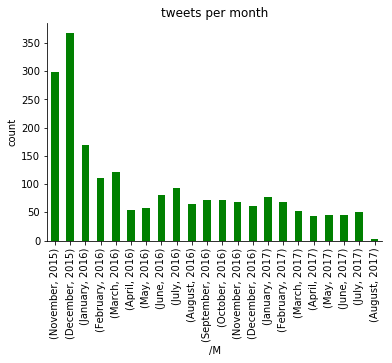

In [229]:
fig, ax = plt.subplots()
tweets_per_month.plot(kind='bar', color='g')
#tweets_per_month.plot(kind='line', color='r')
ax.set_title('tweets per month')
ax.set_ylabel('count')
ax.set_xlabel('/M')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### 2. favorite_count &	retweet_count

In [230]:
ratio = twitter_archive_master['favorite_count'] / twitter_archive_master['retweet_count']

In [231]:
ratio.describe()

count    2073.000000
mean        3.236245
std         1.308540
min         0.000000
25%         2.486004
50%         3.148541
75%         3.890883
max        12.024368
dtype: float64

In [232]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])

0.80698364190817873

> 从中位数和平均数看，大约3.2次点赞会转发一次, 相关性很高

### 3. 

In [238]:
tweets_p1_month = twitter_archive_master.loc[:, ['Month', 'Year', 'Frist_pred_conf']]

In [244]:
tweets_p1_month['M_Y'] = tweets_p1_month.loc[:, 'Month'].astype(str) + '-' + tweets_p1_month.loc[:, 'Year'].astype(str)

In [247]:
tweets_p1_month = tweets_p1_month.drop(['Month', 'Year'], axis=1)
tweets_p1_month.head()

,Frist_pred_conf,M_Y
0,0.097049,August-2017
1,0.323581,August-2017
2,0.716012,July-2017
3,0.170278,July-2017
4,0.555712,July-2017


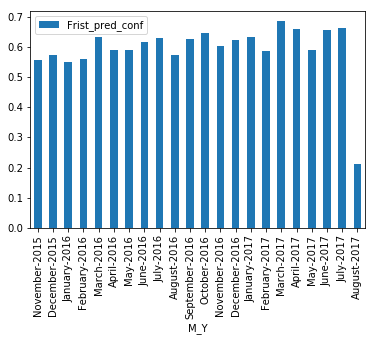

In [266]:
tweets_p1_month.groupby('M_Y', sort=False).mean()[::-1].plot(kind='bar')

In [267]:
## 看来上线后正确率没有明显提高趋势， 没有更新参数或者说2000个tweet图片对训练并没有明显提高

In [269]:
## 如何给狗狗取名字呢，先看看大家喜欢去什么名字
twitter_archive_master['dog_name'].value_counts()

None        577
a            54
Charlie      11
Cooper       10
Tucker       10
Oliver       10
Lucy         10
Penny        10
Sadie         8
Bo            8
Lola          8
Winston       8
Daisy         7
Toby          7
Jax           6
Milo          6
Rusty         6
Scout         6
Stanley       6
Koda          6
Bella         6
Bailey        6
an            6
Dave          6
Alfie         5
Leo           5
the           5
Chester       5
Larry         5
Buddy         5
           ... 
Akumi         1
Flash         1
Yoda          1
Travis        1
Taz           1
Kloey         1
Geno          1
Carper        1
Ike           1
Einstein      1
Monster       1
Obi           1
Sweet         1
Danny         1
Tyrone        1
Ed            1
Crouton       1
Chesney       1
Tassy         1
Brownie       1
Bobby         1
Hermione      1
Kona          1
Ricky         1
Pipsy         1
Kingsley      1
Barney        1
Timofy        1
Erik          1
Rupert        1
Name: dog_name, Length: 

None or a 肯定大多不是狗狗名字，看来给狗狗取名还是很随便的，没有趋势和潮流的

In [ ]:
## except time, what other data can be visualize???